In [207]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORDIS

## 1. Data loading and preprocessing

In [208]:
# Load data
cordish2020 = pd.read_csv("data/cordis/cordis-h2020projects.csv",sep=";",decimal=",")
cordisfp7 = pd.read_csv("data/cordis/cordis-fp7projects.csv",sep=";",decimal=",")
#cordisfp6 = pd.read_csv("data/cordis/cordis-fp6projects.csv",sep=";",decimal=",")
cordisfp5 = pd.read_csv("data/cordis/cordis-fp5projects.csv",sep=";",decimal=",")

In [236]:
# Shapes
print("H2020 (2014-2020): ",cordish2020.shape)
print("FP7 (2007-2013): ",cordisfp7.shape)
# print("FP6 (2002-2006): ",cordisfp6.shape) # 10082
print("FP5 (1998-2002): ",cordisfp5.shape)

H2020 (2014-2020):  (32161, 21)
FP7 (2007-2013):  (25778, 21)
FP6 (2002-2006):  (10082, 21)
FP5 (1998-2002):  (17205, 21)


In [210]:
# Append data
cordis = cordish2020.append(cordisfp7)
#cordis = cordis.append(cordisfp6)
cordis = cordis.append(cordisfp5)
cordis.shape

(75144, 21)

In [211]:
# Cast dates to datetime format
cordis['startDate'] = pd.to_datetime(cordis['startDate'])
cordis['endDate'] = pd.to_datetime(cordis['endDate'])

# Compute duration in days
cordis['duration_days'] = (cordis['endDate'] - cordis['startDate']).dt.days

# Extract start and end years and store in new column of dataframe
cordis['startYear'] = pd.DatetimeIndex(cordis['startDate']).year
cordis['endYear'] = pd.DatetimeIndex(cordis['endDate']).year

In [212]:
# Remove useless columns
cordis = cordis.drop(columns=['startDate','endDate','subjects'])

In [213]:
cordis.dtypes

rcn                       int64
id                       object
acronym                  object
status                   object
programme                object
topics                   object
frameworkProgramme       object
title                    object
projectUrl               object
objective                object
totalCost               float64
ecMaxContribution       float64
call                     object
fundingScheme            object
coordinator              object
coordinatorCountry       object
participants             object
participantCountries     object
duration_days           float64
startYear               float64
endYear                 float64
dtype: object

In [214]:
cordis.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,projectUrl,objective,...,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,duration_days,startYear,endYear
0,197163,672890,TailorFit,CLOSED,H2020-EU.2.3.1.;H2020-EU.2.1.2.,NMP-25-2014-1,H2020,TailorFit; The Integrated “made to measure” wo...,http://www.creasolution.com,'The project targets all luxury fashion firms ...,...,"50,000.00",H2020-SMEINST-1-2014,SME-1,CREA SOLUTION SRL,IT,NaN,NaN,182.00,"2,015.00","2,015.00"
1,193257,633814,PEGASUS,CLOSED,H2020-EU.3.2.,ISIB-01-2014,H2020,Public Ecosystem Goods And Services from land ...,http://pegasus.ieep.eu/,EU's agricultural and forestry land provides a...,...,"2,977,525.00",H2020-ISIB-2014-2,RIA,"INSTITUTE FOR EUROPEAN ENVIRONMENTAL POLICY, L...",UK,MITTETULUNDUSUHING OKOLOOGILISTE TEHNOLOOGIATE...,EE;FR;NL;AT;PT;UK;CZ;IT;DE;SI;BE,"1,095.00","2,015.00","2,018.00"
2,213807,785419,LABOR,SIGNED,H2020-EU.3.4.5.4.,JTI-CS2-2017-CFP06-AIR-02-49,H2020,Lean robotized AssemBly and cOntrol of composi...,https://www.labor-project.eu/,"According to the Global Market Forecast, there...",...,"1,995,062.50",H2020-CS2-CFP06-2017-01,CS2-IA,AEA s.r.l.,IT,UNIVERSITA DEGLI STUDI DI SALERNO;UNIVERSITA D...,IT,"1,095.00","2,018.00","2,021.00"
3,205543,721362,ZAero,CLOSED,H2020-EU.2.1.5.1.,FOF-03-2016,H2020,Zero-defect manufacturing of composite parts i...,http://www.zaero-project.eu,In the aerospace industry very high quality st...,...,"3,548,206.01",H2020-FOF-2016,IA,PROFACTOR GMBH,AT,M TORRES DISEÑOS INDUSTRIALES SA;FUNDACION PAR...,ES;FR;DE,"1,094.00","2,016.00","2,019.00"
4,229365,861924,SustInAfrica,SIGNED,H2020-EU.3.2.1.1.,SFS-35-2019-2020,H2020,Sustainable intensification of food production...,NaN,Large areas of agricultural land in W. and N. ...,...,"6,997,318.74",H2020-SFS-2019-2,RIA,LUONNONVARAKESKUS,FI,GORTA;FCIENCIAS.ID - ASSOCIACAO PARA A INVESTI...,IE;PT;GH;BF;TN;NE;EG;AT;IT;DE,"1,825.00","2,020.00","2,025.00"


In [232]:
cordis.to_csv('corpus.csv',columns=['objective'],index=False)

In [234]:
corpus_list = cordis['objective'].tolist()
corpus_raw = list(map(lambda x: x['objective'], corpus_list))

TypeError: string indices must be integers

In [235]:
corpus_list

["'The project targets all luxury fashion firms that specifically manufacture classic menswear clothing (i.e. shirts, jackets, pants, coats...) and propose its personalisation. On one hand, personalisation is a great opportunity to provide the final clients with the cloths they desire, but on the other luxury fashion houses are facing the increasing need of having some automated solutions that will help them in creating 'customized product' in a faster lead time. In fact all fashion houses manufacturing menswear are focused on providing Made to Measure products to their customers, because it increases their revenues, but at the same time this also increases their costs.  An integrated and automated management of the whole value chain will decrease the lead time, increase customization application and decrease costs.\nCrea Solution Srl proposes the TailorFit solution that will dramatically accelerate the timing of the whole process, by managing every step of the cloths manufacturing: 1)

## 2. Descriptive analysis

### Status
- ONG: ongoing
- SIGNED: firmado
- CLOSED: cerrado (¿sin terminar?)
- CLO: ¿=closed?
- TERMINATED: terminado (¿finalizado?)
- CAN: ¿?

In [215]:
cordis['status'].value_counts()

ONG           23442
SIGNED        20559
CLOSED        11178
CLO            1969
TERMINATED      424
CAN             179
Name: status, dtype: int64

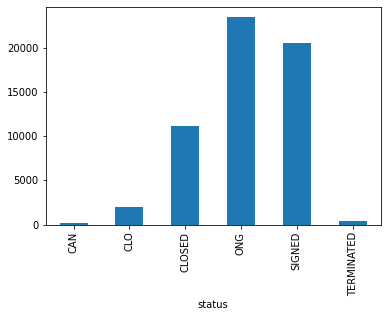

In [216]:
cordis.groupby('status')['id'].nunique().plot(kind='bar')
plt.show()

### Topics

In [217]:
cordis['topics'].value_counts()

EIC-SMEInst-2018-2020                2439
MSCA-IF-2019                         1482
MSCA-IF-2018                         1373
MSCA-IF-2017                         1367
MSCA-IF-2016                         1253
                                     ... 
ENERGY.2009.2.2.1                       1
JTI-CS2-2014-CFP01-FRC-02-01            1
KBBE-2008-2-1-01;KBBE-2008-2-4-01       1
SEC-2007-2.1-01                         1
INCO.2013-1.5                           1
Name: topics, Length: 8048, dtype: int64

In [218]:
#cordis.groupby('topics')['id'].nunique().plot(kind='bar')
#plt.show()

### Start and end dates

In [219]:
cordis['startYear'].value_counts()

2,019.00    5551
2,000.00    5224
2,018.00    5064
2,015.00    5038
2,017.00    4978
2,016.00    4955
2,001.00    4912
2,013.00    4562
2,020.00    4484
2,002.00    4446
2,012.00    4332
2,011.00    3966
2,010.00    3602
2,014.00    3335
2,009.00    2901
2,008.00    2826
2,021.00    2034
2,003.00    1287
1,999.00     614
2,007.00     175
1,995.00      80
2,004.00      69
2,005.00      59
2,006.00      28
1,996.00      19
1,988.00      18
2,022.00      17
1,989.00      15
1,990.00       6
1,997.00       3
1,998.00       2
Name: startYear, dtype: int64

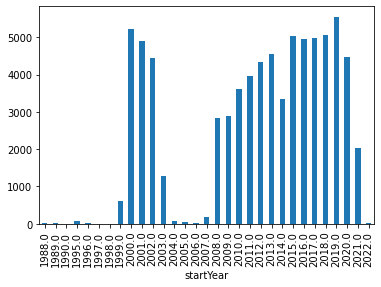

In [220]:
cordis.groupby('startYear')['id'].nunique().plot(kind='bar')
plt.show()

In [221]:
cordis['endYear'].value_counts()

2,021.00    5149
2,018.00    5112
2,016.00    4999
2,019.00    4934
2,017.00    4906
2,015.00    4726
2,022.00    4694
2,004.00    3748
2,020.00    3627
2,014.00    3616
2,003.00    3475
2,023.00    3322
2,013.00    3179
2,002.00    2947
2,012.00    2649
2,005.00    2225
2,011.00    2035
2,024.00    1873
2,001.00    1631
2,025.00    1202
2,006.00    1160
2,010.00    1061
2,000.00     557
2,026.00     430
2,009.00     205
2,007.00     166
1,999.00     109
2,008.00      88
2,062.00      17
2,027.00      16
2,035.00      12
2,032.00      12
2,031.00       6
2,037.00       4
2,033.00       4
2,064.00       3
2,059.00       3
2,054.00       3
2,030.00       3
2,040.00       3
2,070.00       2
2,065.00       2
2,061.00       2
2,047.00       2
2,046.00       1
2,028.00       1
1,990.00       1
2,063.00       1
2,045.00       1
2,057.00       1
2,055.00       1
Name: endYear, dtype: int64

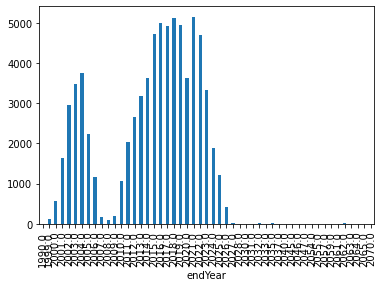

In [222]:
cordis.groupby('endYear')['id'].nunique().plot(kind='bar')
plt.show()

In [223]:
cordis['duration_days'].mean()

1087.5918350783215

array([[<AxesSubplot:title={'center':'duration_days'}>]], dtype=object)

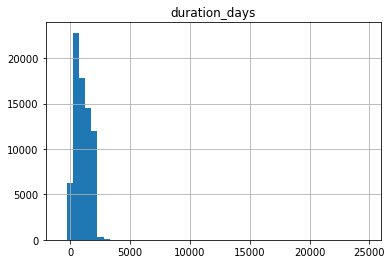

In [224]:
cordis.hist(column='duration_days',bins=50)

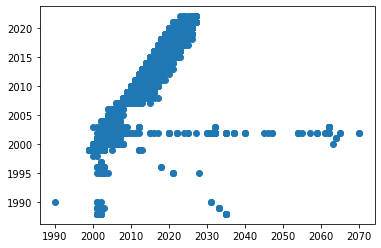

In [225]:
plt.scatter(cordis['endYear'],cordis['startYear'])

### Total cost

In [226]:
cordis['totalCost'].mean()

2188865.843434274

array([[<AxesSubplot:title={'center':'totalCost'}>]], dtype=object)

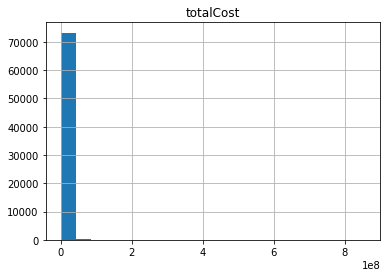

In [227]:
cordis.hist(column='totalCost',bins=20)

In [228]:
cordis['ecMaxContribution'].mean()

1617052.9677372274

array([[<AxesSubplot:title={'center':'ecMaxContribution'}>]], dtype=object)

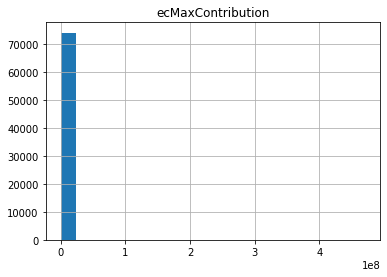

In [229]:
cordis.hist(column='ecMaxContribution',bins=20)

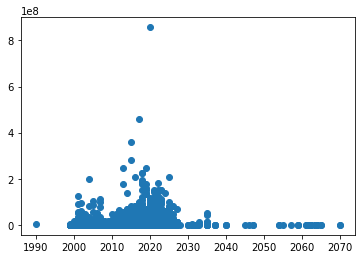

In [156]:
plt.scatter(cordis['endYear'],cordis['totalCost'])

### Coordinator country

In [118]:
cordis['coordinatorCountry'].value_counts()

UK    13327
DE     9155
FR     8070
ES     7508
IT     6490
      ...  
CI        1
AI        1
MY        1
TZ        1
SY        1
Name: coordinatorCountry, Length: 95, dtype: int64

In [157]:
heatmap_df = pd.pivot_table(data=cordis,index='coordinatorCountry',values='totalCost',columns='endYear')
heatmap_df.head()

endYear,"1,990.00","1,999.00","2,000.00","2,001.00","2,002.00","2,003.00","2,004.00","2,005.00","2,006.00","2,007.00",...,"2,054.00","2,055.00","2,057.00","2,059.00","2,061.00","2,062.00","2,063.00","2,064.00","2,065.00","2,070.00"
coordinatorCountry,,,,,,,,,,,,,,,,,,,,,
AE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:xlabel='endYear', ylabel='coordinatorCountry'>

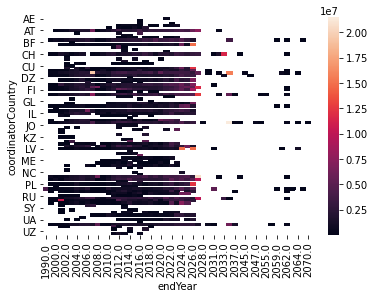

In [158]:
sns.heatmap(heatmap_df)